In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report, confusion_matrix

In [3]:
df_original = pd.read_csv("D:/Machine Learning/IS Project/student_depression_dataset.csv")

In [4]:
df = df_original.copy()

In [5]:
df.shape

(27901, 18)

In [6]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [7]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27,Surat,Student,5,0,5.75,5,0,'5-6 hours',Unhealthy,'Class 12',Yes,7,1,Yes,0
27897,140686,Male,27,Ludhiana,Student,2,0,9.40,3,0,'Less than 5 hours',Healthy,MSc,No,0,3,Yes,0
27898,140689,Male,31,Faridabad,Student,3,0,6.61,4,0,'5-6 hours',Unhealthy,MD,No,12,2,No,0
27899,140690,Female,18,Ludhiana,Student,5,0,6.88,2,0,'Less than 5 hours',Healthy,'Class 12',Yes,10,5,No,1
27900,140699,Male,27,Patna,Student,4,0,9.24,1,0,'Less than 5 hours',Healthy,BCA,Yes,2,3,Yes,1


In [8]:
print(df.dtypes)

id                                         int64
Gender                                    object
Age                                        int64
City                                      object
Profession                                object
Academic Pressure                          int64
Work Pressure                              int64
CGPA                                     float64
Study Satisfaction                         int64
Job Satisfaction                           int64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  int64  
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [10]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27896    False
27897    False
27898    False
27899    False
27900    False
Length: 27901, dtype: bool

In [12]:
print(df[df.duplicated()])  # Returns Only Duplicates.   , no duplicates in this

Empty DataFrame
Columns: [id, Gender, Age, City, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


In [13]:
print(df[df.duplicated(subset=["id"])]) # id duplicates

Empty DataFrame
Columns: [id, Gender, Age, City, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


In [14]:
# df.drop_duplicates()

In [15]:
len(df)

27901

In [16]:
df.isnull()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27899,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [18]:
print(df.columns)

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')


In [19]:
df.rename(columns={"Academic Pressure": "Academic_Pressure"}, inplace=True)
df.rename(columns={"Work Pressure": "Work_Pressure"}, inplace=True)
df.rename(columns={"Study Satisfaction": "Study_Satisfaction"}, inplace=True)
df.rename(columns={"Job Satisfaction": "Job_Satisfaction"}, inplace=True)
df.rename(columns={"Sleep Duration": "Sleep_Duration"}, inplace=True)
df.rename(columns={"Dietary Habits": "Dietary_Habits"}, inplace=True)
df.rename(columns={"Have you ever had suicidal thoughts ?": "Ever_had_suicidal_thoughts"}, inplace=True)
df.rename(columns={"Work/Study Hours": "Study_Hours"}, inplace=True)
df.rename(columns={"Financial Stress": "Financial_Stress"}, inplace=True)
df.rename(columns={"Family History of Mental Illness": "Family_History_of_Mental_Illness"}, inplace=True)
df


,id,Gender,Age,City,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27,Surat,Student,5,0,5.75,5,0,'5-6 hours',Unhealthy,'Class 12',Yes,7,1,Yes,0
27897,140686,Male,27,Ludhiana,Student,2,0,9.40,3,0,'Less than 5 hours',Healthy,MSc,No,0,3,Yes,0
27898,140689,Male,31,Faridabad,Student,3,0,6.61,4,0,'5-6 hours',Unhealthy,MD,No,12,2,No,0
27899,140690,Female,18,Ludhiana,Student,5,0,6.88,2,0,'Less than 5 hours',Healthy,'Class 12',Yes,10,5,No,1


In [20]:
unique_Gender = df["Gender"].value_counts()
print(unique_Gender)

Male      15547
Female    12354
Name: Gender, dtype: int64


In [21]:
count_Profession = pd.DataFrame(df["Profession"].value_counts())
print(count_Profession)

                          Profession
Student                        27870
Architect                          8
Teacher                            6
'Digital Marketer'                 3
'Content Writer'                   2
Chef                               2
Doctor                             2
Pharmacist                         2
'Civil Engineer'                   1
'UX/UI Designer'                   1
'Educational Consultant'           1
Manager                            1
Lawyer                             1
Entrepreneur                       1


In [22]:
df = df[df['Profession'] == 'Student']
df.drop(columns=['Profession'], inplace=True)  # No need for Profession after filtering
df

C:\Users\anith\AppData\Local\Temp\ipykernel_1336\945327185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Profession'], inplace=True)  # No need for Profession after filtering


,id,Gender,Age,City,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,2,Male,33,Visakhapatnam,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27,Surat,5,0,5.75,5,0,'5-6 hours',Unhealthy,'Class 12',Yes,7,1,Yes,0
27897,140686,Male,27,Ludhiana,2,0,9.40,3,0,'Less than 5 hours',Healthy,MSc,No,0,3,Yes,0
27898,140689,Male,31,Faridabad,3,0,6.61,4,0,'5-6 hours',Unhealthy,MD,No,12,2,No,0
27899,140690,Female,18,Ludhiana,5,0,6.88,2,0,'Less than 5 hours',Healthy,'Class 12',Yes,10,5,No,1


In [23]:
df.drop(columns=["id"],inplace=True)

C:\Users\anith\AppData\Local\Temp\ipykernel_1336\1197229155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["id"],inplace=True)


In [24]:
df["Work_Pressure"].value_counts()

0    27867
5        2
2        1
Name: Work_Pressure, dtype: int64

In [25]:
df["Job_Satisfaction"].value_counts()

0    27862
2        3
4        2
1        2
3        1
Name: Job_Satisfaction, dtype: int64

In [26]:
df.drop(columns=["Work_Pressure"],inplace=True)
df.drop(columns=["Job_Satisfaction"],inplace=True,errors='ignore')

df.head(10)

C:\Users\anith\AppData\Local\Temp\ipykernel_1336\1749798955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Work_Pressure"],inplace=True)
C:\Users\anith\AppData\Local\Temp\ipykernel_1336\1749798955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Job_Satisfaction"],inplace=True,errors='ignore')


,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Male,33,Visakhapatnam,5,8.97,2,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,Female,24,Bangalore,2,5.90,5,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,Male,31,Srinagar,3,7.03,5,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,Female,28,Varanasi,3,5.59,2,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,Female,25,Jaipur,4,8.13,3,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0
5,Male,29,Pune,2,5.70,3,'Less than 5 hours',Healthy,PhD,No,4,1,No,0
6,Male,30,Thane,3,9.54,4,'7-8 hours',Healthy,BSc,No,1,2,No,0
7,Female,30,Chennai,2,8.04,4,'Less than 5 hours',Unhealthy,'Class 12',No,0,1,Yes,0
8,Male,28,Nagpur,3,9.79,1,'7-8 hours',Moderate,B.Ed,Yes,12,3,No,1
9,Male,31,Nashik,2,8.38,3,'Less than 5 hours',Moderate,LLB,Yes,2,5,No,1


In [27]:
df.shape

(27870, 14)

In [28]:
print(df.columns)

Index(['Gender', 'Age', 'City', 'Academic_Pressure', 'CGPA',
       'Study_Satisfaction', 'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Ever_had_suicidal_thoughts', 'Study_Hours', 'Financial_Stress',
       'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')


In [29]:
#df.drop(columns=["Gender"],inplace=True)
#df.drop(columns=["Family_History_of_Mental_Illness"],inplace=True)
#df.drop(columns=["CGPA"],inplace=True)

In [30]:
unique_Age = df["Age"].value_counts().sort_index()
print(unique_Age)

18    1587
19    1560
20    2237
21    1723
22    1159
23    1641
24    2255
25    1781
26    1154
27    1461
28    2129
29    1947
30    1145
31    1425
32    1258
33    1892
34    1467
35      10
36       7
37       2
38       8
39       3
41       1
42       4
43       2
44       1
46       2
48       3
49       1
51       1
54       1
56       1
58       1
59       1
Name: Age, dtype: int64


In [31]:
print(df["Age"].value_counts())

24    2255
20    2237
28    2129
29    1947
33    1892
25    1781
21    1723
23    1641
18    1587
19    1560
34    1467
27    1461
31    1425
32    1258
22    1159
26    1154
30    1145
35      10
38       8
36       7
42       4
48       3
39       3
43       2
46       2
37       2
49       1
51       1
44       1
59       1
54       1
58       1
56       1
41       1
Name: Age, dtype: int64


In [32]:
df["Age"].describe()

count    27870.000000
mean        25.821134
std          4.906574
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         59.000000
Name: Age, dtype: float64

In [33]:
df = df[df["Age"] <= 35]
df

,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Male,33,Visakhapatnam,5,8.97,2,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,Female,24,Bangalore,2,5.90,5,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,Male,31,Srinagar,3,7.03,5,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,Female,28,Varanasi,3,5.59,2,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,Female,25,Jaipur,4,8.13,3,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27,Surat,5,5.75,5,'5-6 hours',Unhealthy,'Class 12',Yes,7,1,Yes,0
27897,Male,27,Ludhiana,2,9.40,3,'Less than 5 hours',Healthy,MSc,No,0,3,Yes,0
27898,Male,31,Faridabad,3,6.61,4,'5-6 hours',Unhealthy,MD,No,12,2,No,0
27899,Female,18,Ludhiana,5,6.88,2,'Less than 5 hours',Healthy,'Class 12',Yes,10,5,No,1


In [34]:
count_City = df["City"].value_counts()
print(count_City)

Kalyan                  1561
Srinagar                1371
Hyderabad               1337
Vasai-Virar             1288
Lucknow                 1154
Thane                   1139
Ludhiana                1107
Agra                    1090
Surat                   1076
Kolkata                 1064
Jaipur                  1034
Patna                   1002
Visakhapatnam            967
Pune                     967
Ahmedabad                949
Bhopal                   931
Chennai                  882
Meerut                   821
Rajkot                   812
Delhi                    766
Bangalore                765
Ghaziabad                743
Mumbai                   697
Vadodara                 692
Varanasi                 684
Nagpur                   650
Indore                   643
Kanpur                   607
Nashik                   545
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
Kibara        

In [35]:
df["City"] = df["City"].replace({"Saanvi": "Others", "Bhavna": "Others", "City": "Others", "Harsha": "Others", "Kibara": "Others", "Nandini": "Others", 
                                 "Nalini": "Others", "Mihir": "Others", "Nalyan": "Others", "M.Com": "Others", "ME": "Others", "Rashi": "Others", "Gaurav": "Others", 
                                 "Reyansh": "Others","Harsh": "Others", "Vaanya": "Others", "Mira": "Others", "3": "Others", "'Less than 5 Kalyan'": "Others", 
                                 "'Less Delhi'": "Others", "M.Tech": "Others", "Khaziabad": "Others"})
df.head()

C:\Users\anith\AppData\Local\Temp\ipykernel_1336\2759318818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"] = df["City"].replace({"Saanvi": "Others", "Bhavna": "Others", "City": "Others", "Harsha": "Others", "Kibara": "Others", "Nandini": "Others",


,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Male,33,Visakhapatnam,5,8.97,2,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,Female,24,Bangalore,2,5.90,5,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,Male,31,Srinagar,3,7.03,5,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,Female,28,Varanasi,3,5.59,2,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,Female,25,Jaipur,4,8.13,3,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [36]:
count_City = df["City"].value_counts()
print(count_City)


Kalyan           1561
Srinagar         1371
Hyderabad        1337
Vasai-Virar      1288
Lucknow          1154
Thane            1139
Ludhiana         1107
Agra             1090
Surat            1076
Kolkata          1064
Jaipur           1034
Patna            1002
Visakhapatnam     967
Pune              967
Ahmedabad         949
Bhopal            931
Chennai           882
Meerut            821
Rajkot            812
Delhi             766
Bangalore         765
Ghaziabad         743
Mumbai            697
Vadodara          692
Varanasi          684
Nagpur            650
Indore            643
Kanpur            607
Nashik            545
Faridabad         461
Others             26
Name: City, dtype: int64


In [37]:
unique_Academic_Pressure = df["Academic_Pressure"].value_counts()
print(unique_Academic_Pressure)

3    7440
5    6275
4    5148
1    4789
2    4172
0       7
Name: Academic_Pressure, dtype: int64


In [38]:
unique_CGPA = df["CGPA"].unique()
print(unique_CGPA)

[ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71    7.87
  5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09    9.82
  8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64    5.27
  6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88    5.32
  6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79    9.95
  5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81    6.03
  5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.75    6.16
  9.5     7.99    5.67    8.92    6.19    5.76    6.25    5.11    5.58
  5.65    9.89    8.03    6.61    9.41    8.64    7.21    8.28    6.04
  9.13    8.08    9.96    5.12    8.35    7.07    9.6     9.24    8.54
  8.78

In [39]:
valid_cgpa = ((df["CGPA"] >= 0) & (df["CGPA"] <= 10)).sum()
print(valid_cgpa)


27831


In [40]:
df.shape

(27831, 14)

In [41]:
unique_Study_Satisfaction = df["Study_Satisfaction"].value_counts()
print(unique_Study_Satisfaction)

4    6344
2    5830
3    5802
1    5437
5    4409
0       9
Name: Study_Satisfaction, dtype: int64


In [42]:
unique_SleepDuration = pd.DataFrame(df["Sleep_Duration"].value_counts())
print(unique_SleepDuration)

                     Sleep_Duration
'Less than 5 hours'            8297
'7-8 hours'                    7328
'5-6 hours'                    6161
'More than 8 hours'            6027
Others                           18


In [43]:
df["Sleep_Duration"] = df["Sleep_Duration"].str.strip("'")
df.head()

C:\Users\anith\AppData\Local\Temp\ipykernel_1336\4142878814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sleep_Duration"] = df["Sleep_Duration"].str.strip("'")


,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Male,33,Visakhapatnam,5,8.97,2,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
1,Female,24,Bangalore,2,5.90,5,5-6 hours,Moderate,BSc,No,3,2,Yes,0
2,Male,31,Srinagar,3,7.03,5,Less than 5 hours,Healthy,BA,No,9,1,Yes,0
3,Female,28,Varanasi,3,5.59,2,7-8 hours,Moderate,BCA,Yes,4,5,Yes,1
4,Female,25,Jaipur,4,8.13,3,5-6 hours,Moderate,M.Tech,Yes,1,1,No,0


In [44]:
unique_Dietary_Habits = pd.DataFrame(df["Dietary_Habits"].value_counts())
print(unique_Dietary_Habits)

           Dietary_Habits
Unhealthy           10298
Moderate             9894
Healthy              7627
Others                 12


In [45]:
# Check depression rates for each dietary habit
print(df.groupby('Dietary_Habits')['Depression'].mean())


Dietary_Habits
Healthy      0.453520
Moderate     0.560340
Others       0.666667
Unhealthy    0.707516
Name: Depression, dtype: float64


In [46]:
count_Degree = pd.DataFrame(df["Degree"].value_counts())
print(count_Degree)

            Degree
'Class 12'    6070
B.Ed          1862
B.Com         1504
B.Arch        1476
BCA           1432
MSc           1184
B.Tech        1152
MCA           1040
M.Tech        1021
BHM            921
BSc            881
M.Ed           819
B.Pharm        809
M.Com          732
BBA            695
MBBS           691
LLB            670
BE             612
BA             599
M.Pharm        580
MD             568
MBA            562
MA             542
PhD            518
LLM            481
MHM            191
ME             184
Others          35


In [47]:
df["Degree"] = df["Degree"].str.replace("'", "").replace("Class 12", "Class12")


C:\Users\anith\AppData\Local\Temp\ipykernel_1336\1369325584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Degree"] = df["Degree"].str.replace("'", "").replace("Class 12", "Class12")


In [48]:
df['Degree'].value_counts()

Class12    6070
B.Ed       1862
B.Com      1504
B.Arch     1476
BCA        1432
MSc        1184
B.Tech     1152
MCA        1040
M.Tech     1021
BHM         921
BSc         881
M.Ed        819
B.Pharm     809
M.Com       732
BBA         695
MBBS        691
LLB         670
BE          612
BA          599
M.Pharm     580
MD          568
MBA         562
MA          542
PhD         518
LLM         481
MHM         191
ME          184
Others       35
Name: Degree, dtype: int64

In [49]:
df["Ever_had_suicidal_thoughts"].value_counts()


Yes    17615
No     10216
Name: Ever_had_suicidal_thoughts, dtype: int64

In [50]:
df["Study_Hours"].value_counts()

10    4227
12    3165
11    2888
8     2505
6     2246
9     2020
7     1999
0     1695
4     1607
2     1580
3     1466
5     1288
1     1145
Name: Study_Hours, dtype: int64

In [51]:
df["Financial_Stress"].value_counts()

5    6693
4    5759
3    5213
1    5112
2    5051
?       3
Name: Financial_Stress, dtype: int64

In [52]:
df[df["Financial_Stress"] == "?"]


,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
4458,Female,32,Varanasi,3,5.64,1,5-6 hours,Healthy,BCA,No,12,?,No,1
13596,Male,29,Hyderabad,2,8.94,3,Less than 5 hours,Unhealthy,B.Ed,No,12,?,Yes,0
19266,Female,20,Kolkata,1,6.83,1,5-6 hours,Healthy,MBBS,No,9,?,Yes,0


In [53]:
df["Financial_Stress"] = df["Financial_Stress"].replace("?", df["Financial_Stress"].mode()[0])  


C:\Users\anith\AppData\Local\Temp\ipykernel_1336\2073781256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Financial_Stress"] = df["Financial_Stress"].replace("?", df["Financial_Stress"].mode()[0])


In [54]:
 df["Financial_Stress"].value_counts()  

5    6696
4    5759
3    5213
1    5112
2    5051
Name: Financial_Stress, dtype: int64

In [55]:
df['Financial_Stress'] = df['Financial_Stress'].astype(int)

C:\Users\anith\AppData\Local\Temp\ipykernel_1336\2661154745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Financial_Stress'] = df['Financial_Stress'].astype(int)


In [56]:
depression_history = df["Family_History_of_Mental_Illness"].value_counts()
print(depression_history)


No     14370
Yes    13461
Name: Family_History_of_Mental_Illness, dtype: int64


In [57]:
 df["Depression"].value_counts()

1    16297
0    11534
Name: Depression, dtype: int64

In [58]:
df.shape

(27831, 14)

In [59]:
df.columns

Index(['Gender', 'Age', 'City', 'Academic_Pressure', 'CGPA',
       'Study_Satisfaction', 'Sleep_Duration', 'Dietary_Habits', 'Degree',
       'Ever_had_suicidal_thoughts', 'Study_Hours', 'Financial_Stress',
       'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')

In [60]:
df.head(10)

,Gender,Age,City,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Male,33,Visakhapatnam,5,8.97,2,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
1,Female,24,Bangalore,2,5.90,5,5-6 hours,Moderate,BSc,No,3,2,Yes,0
2,Male,31,Srinagar,3,7.03,5,Less than 5 hours,Healthy,BA,No,9,1,Yes,0
3,Female,28,Varanasi,3,5.59,2,7-8 hours,Moderate,BCA,Yes,4,5,Yes,1
4,Female,25,Jaipur,4,8.13,3,5-6 hours,Moderate,M.Tech,Yes,1,1,No,0
5,Male,29,Pune,2,5.70,3,Less than 5 hours,Healthy,PhD,No,4,1,No,0
6,Male,30,Thane,3,9.54,4,7-8 hours,Healthy,BSc,No,1,2,No,0
7,Female,30,Chennai,2,8.04,4,Less than 5 hours,Unhealthy,Class12,No,0,1,Yes,0
8,Male,28,Nagpur,3,9.79,1,7-8 hours,Moderate,B.Ed,Yes,12,3,No,1
9,Male,31,Nashik,2,8.38,3,Less than 5 hours,Moderate,LLB,Yes,2,5,No,1


In [61]:
df.describe()

,Age,Academic_Pressure,CGPA,Study_Satisfaction,Study_Hours,Financial_Stress,Depression
count,27831.000000,27831.000000,27831.000000,27831.000000,27831.000000,27831.000000,27831.000000
mean,25.798067,3.141102,7.656718,2.943624,7.160289,3.139269,0.585570
std,4.865171,1.381112,1.469971,1.361006,3.706526,1.437426,0.492632
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,35.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [62]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27831 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            27831 non-null  object 
 1   Age                               27831 non-null  int64  
 2   City                              27831 non-null  object 
 3   Academic_Pressure                 27831 non-null  int64  
 4   CGPA                              27831 non-null  float64
 5   Study_Satisfaction                27831 non-null  int64  
 6   Sleep_Duration                    27831 non-null  object 
 7   Dietary_Habits                    27831 non-null  object 
 8   Degree                            27831 non-null  object 
 9   Ever_had_suicidal_thoughts        27831 non-null  object 
 10  Study_Hours                       27831 non-null  int64  
 11  Financial_Stress                  27831 non-null  int32  
 12  Fami

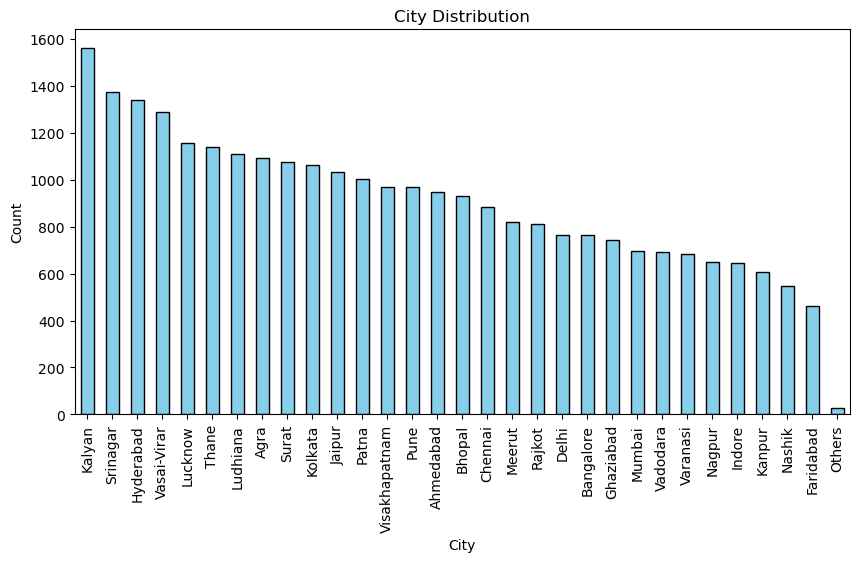

In [63]:
# City distribution
df["City"].value_counts().plot(kind="bar", figsize=(10, 5), color="skyblue", edgecolor="black")
plt.title("City Distribution")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate labels if too long
plt.show()


In [64]:
city_depression = df.groupby(["City", "Depression"]).size().unstack()

In [65]:

print(city_depression.head())

Depression    0    1
City                
Agra        507  583
Ahmedabad   311  638
Bangalore   299  466
Bhopal      352  579
Chennai     355  527


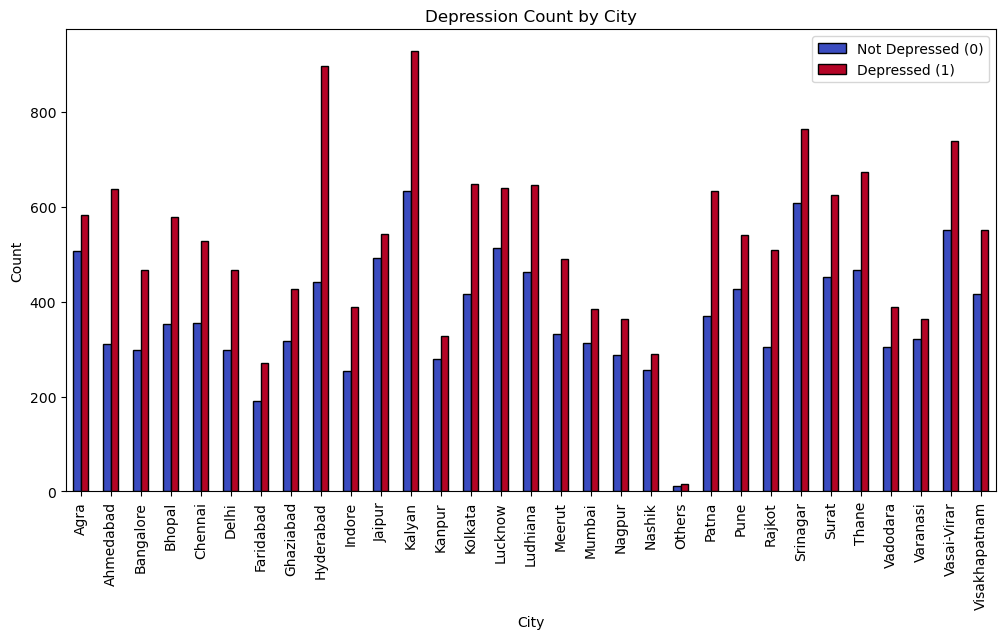

In [66]:
city_depression.plot(kind="bar", stacked=False, figsize=(12, 6), colormap="coolwarm", edgecolor="black")

plt.title("Depression Count by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.xticks(rotation=90)
plt.show()


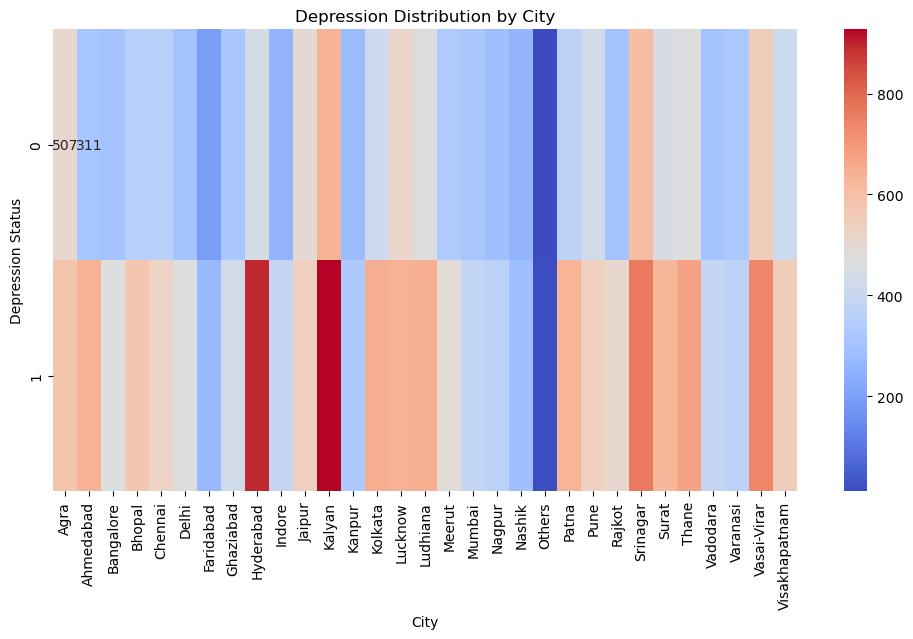

In [67]:

plt.figure(figsize=(12, 6))
sns.heatmap(city_depression.T, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Depression Distribution by City")
plt.xlabel("City")
plt.ylabel("Depression Status")
plt.show()


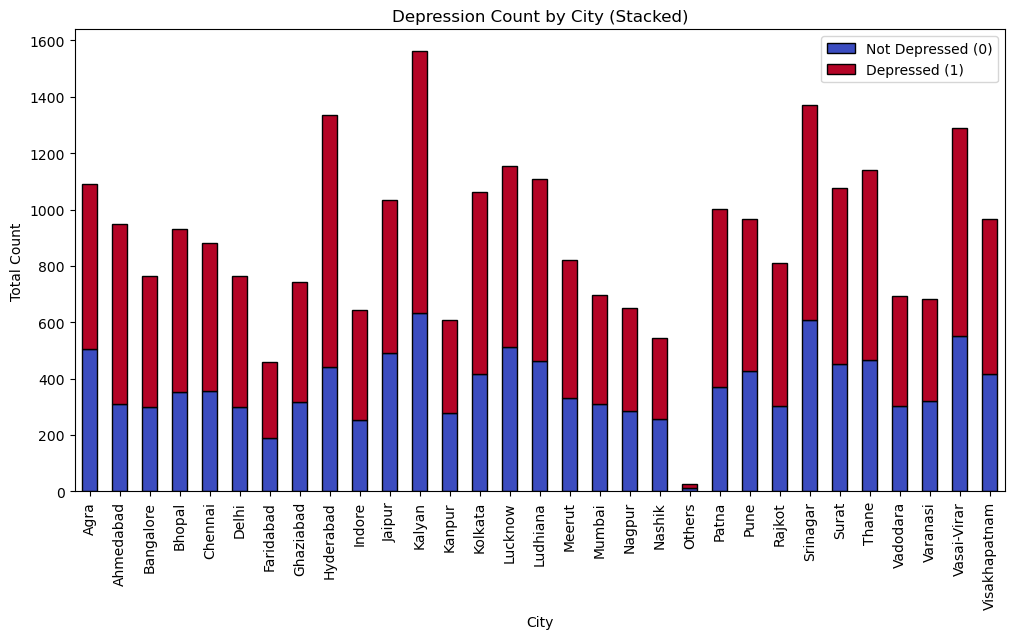

In [68]:
# Plot stacked bar chart
city_depression.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm", edgecolor="black")

plt.title("Depression Count by City (Stacked)")
plt.xlabel("City")
plt.ylabel("Total Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.xticks(rotation=90)
plt.show()


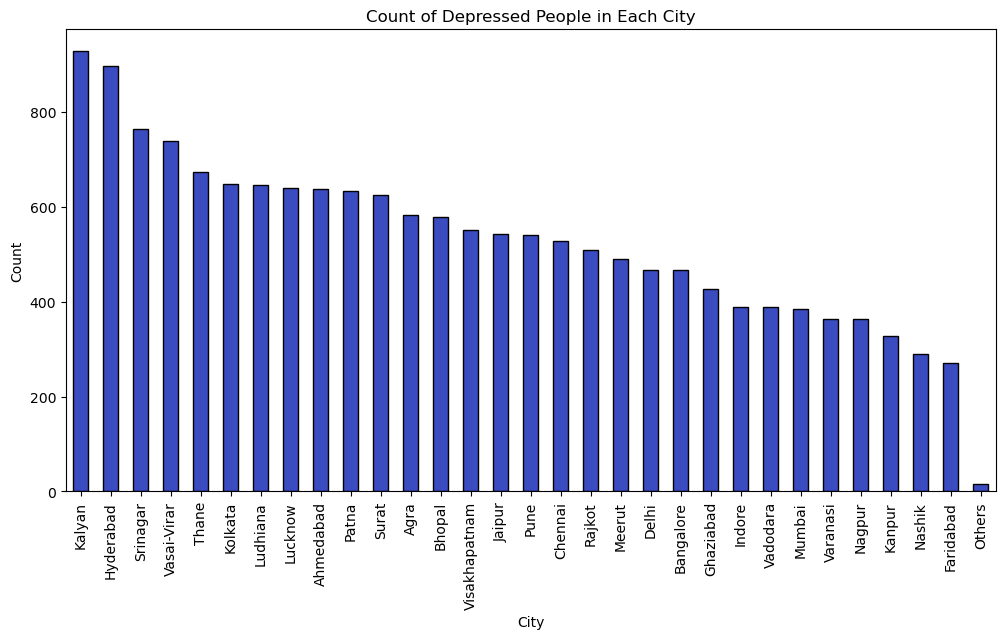

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only depressed people (Depression = 1)
depressed_by_city = df[df["Depression"] == 1]["City"].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
depressed_by_city.plot(kind="bar", colormap="coolwarm", edgecolor="black")

plt.title("Count of Depressed People in Each City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate city names if too long
plt.show()


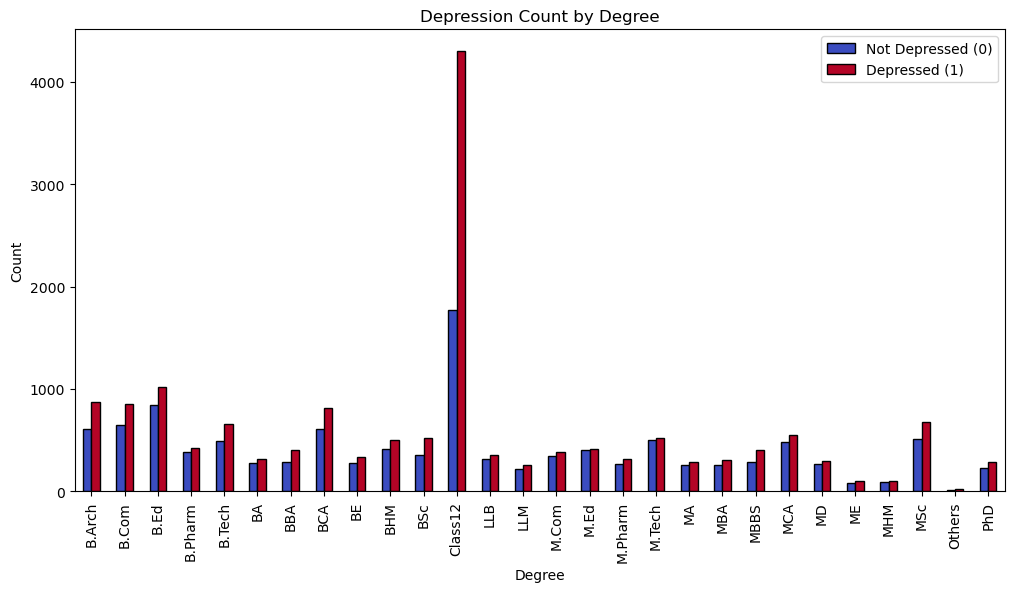

In [70]:

# Count depression cases per Degree
degree_depression = df.groupby(["Degree", "Depression"]).size().unstack()

# Plot grouped bar chart
degree_depression.plot(kind="bar", figsize=(12, 6), colormap="coolwarm", edgecolor="black")

plt.title("Depression Count by Degree")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.xticks(rotation=90)  # Rotate for better readability
plt.show()


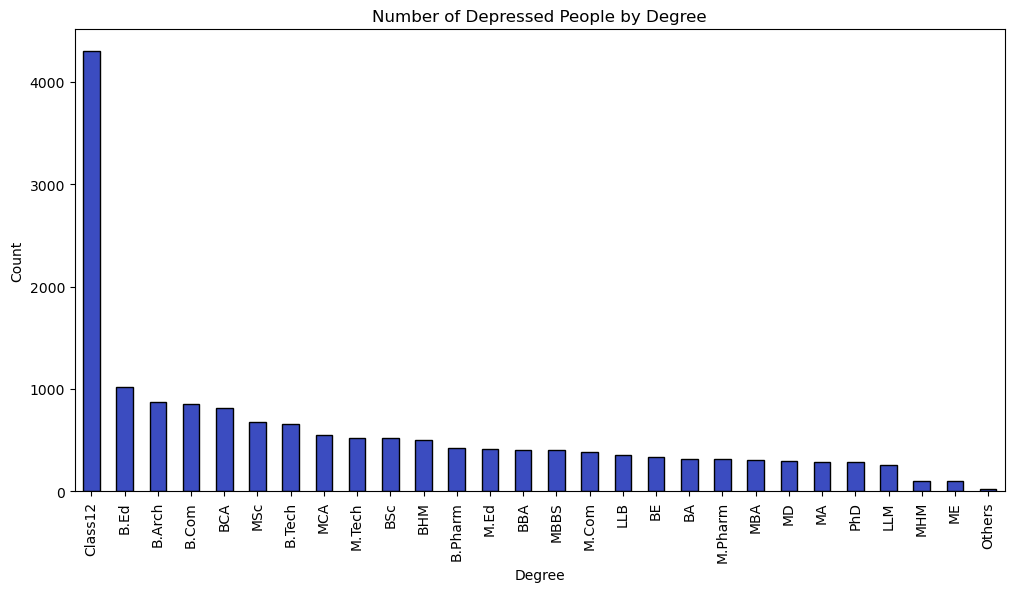

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only depressed people
depressed_by_degree = df[df["Depression"] == 1]["Degree"].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
depressed_by_degree.plot(kind="bar", colormap="coolwarm", edgecolor="black")

plt.title("Number of Depressed People by Degree")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate for readability
plt.show()


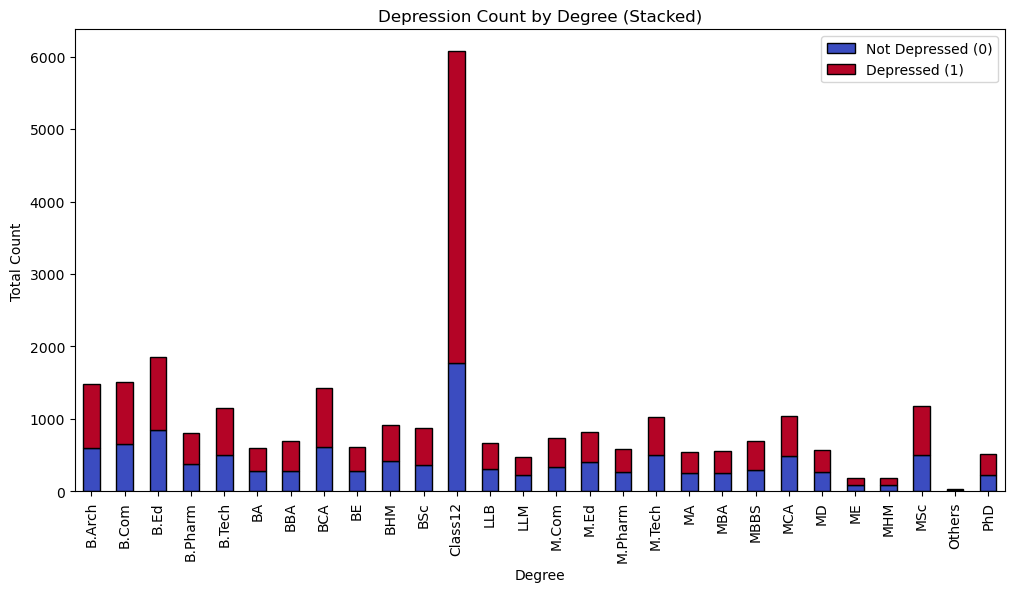

In [72]:
 # Plot stacked bar chart
degree_depression.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm", edgecolor="black")

plt.title("Depression Count by Degree (Stacked)")
plt.xlabel("Degree")
plt.ylabel("Total Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.xticks(rotation=90)
plt.show()


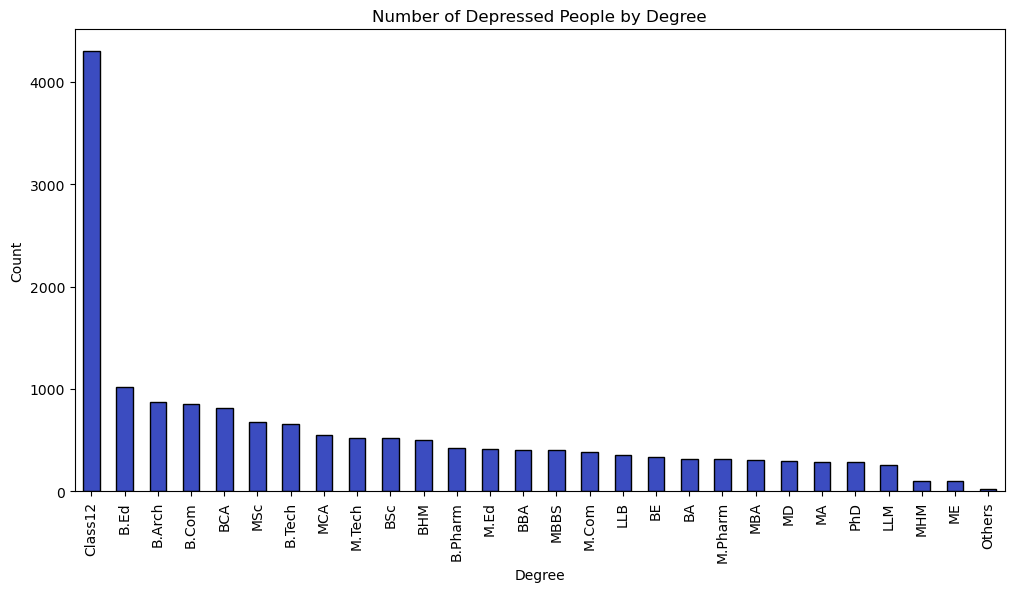

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only depressed people
depressed_by_degree = df[df["Depression"] == 1]["Degree"].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
depressed_by_degree.plot(kind="bar", colormap="coolwarm", edgecolor="black")

plt.title("Number of Depressed People by Degree")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate for readability
plt.show()


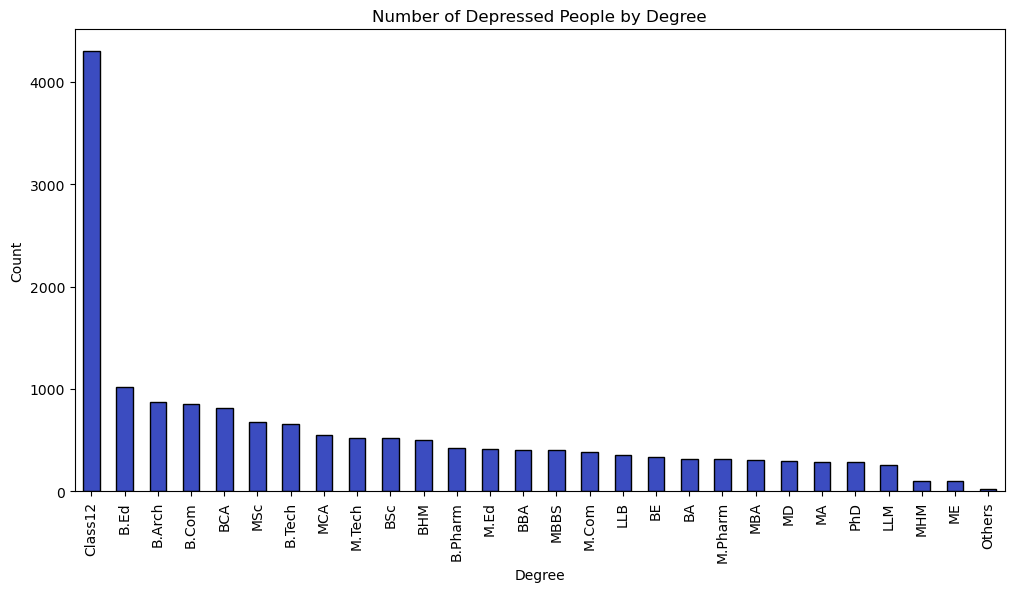

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only depressed people
depressed_by_degree = df[df["Depression"] == 1]["Degree"].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
depressed_by_degree.plot(kind="bar", colormap="coolwarm", edgecolor="black")

plt.title("Number of Depressed People by Degree")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate for readability
plt.show()


In [75]:
df.shape 

(27831, 14)

In [76]:
df.drop(columns=["Degree", "City"], inplace=True, errors="ignore")


C:\Users\anith\AppData\Local\Temp\ipykernel_1336\527749413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Degree", "City"], inplace=True, errors="ignore")


In [77]:
 df.shape

(27831, 12)

In [78]:
df.head()

,Gender,Age,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Male,33,5,8.97,2,5-6 hours,Healthy,Yes,3,1,No,1
1,Female,24,2,5.90,5,5-6 hours,Moderate,No,3,2,Yes,0
2,Male,31,3,7.03,5,Less than 5 hours,Healthy,No,9,1,Yes,0
3,Female,28,3,5.59,2,7-8 hours,Moderate,Yes,4,5,Yes,1
4,Female,25,4,8.13,3,5-6 hours,Moderate,Yes,1,1,No,0


In [79]:
df_ageSort = df.sort_values(by='Age')
df_ageSort.head()

,Gender,Age,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
15807,Male,18,3,9.79,4,Less than 5 hours,Healthy,Yes,12,2,No,1
1329,Female,18,5,8.53,4,7-8 hours,Unhealthy,No,9,4,No,1
1328,Female,18,1,7.70,3,5-6 hours,Healthy,No,5,2,No,0
15754,Male,18,3,5.03,5,5-6 hours,Moderate,No,6,5,No,1
22765,Male,18,5,8.54,4,More than 8 hours,Unhealthy,Yes,8,2,Yes,1


In [80]:
df['Family_History_of_Mental_Illness'].value_counts()

No     14370
Yes    13461
Name: Family_History_of_Mental_Illness, dtype: int64

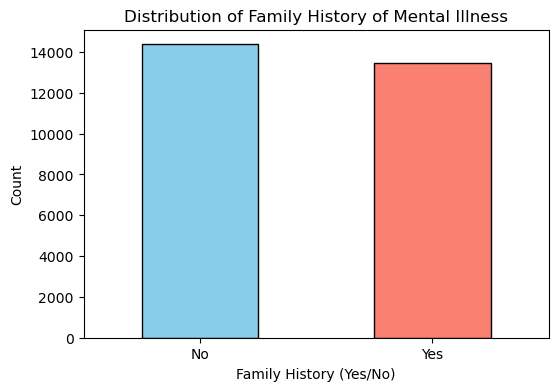

In [81]:

# Count values
family_history_counts = df['Family_History_of_Mental_Illness'].value_counts()

# Bar plot
plt.figure(figsize=(6, 4))
family_history_counts.plot(kind="bar", color=["skyblue", "salmon"], edgecolor="black")
plt.title("Distribution of Family History of Mental Illness")
plt.xlabel("Family History (Yes/No)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [82]:
depression_count = df.groupby('Family_History_of_Mental_Illness')['Depression'].sum()
print(depression_count)

Family_History_of_Mental_Illness
No     8047
Yes    8250
Name: Depression, dtype: int64


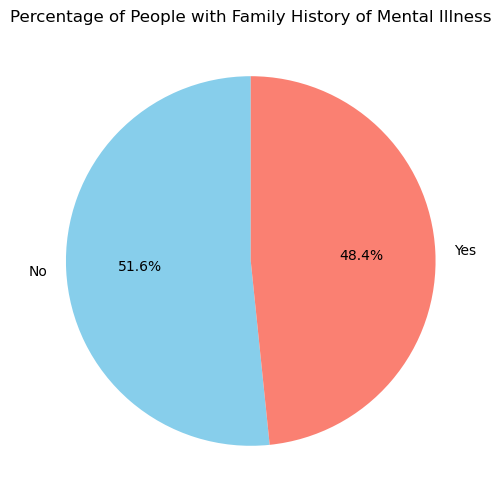

In [83]:
# Pie chart
plt.figure(figsize=(6, 6))
family_history_counts.plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "salmon"], startangle=90)
plt.title("Percentage of People with Family History of Mental Illness")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()


In [84]:
df['Depression'].value_counts() 
 

1    16297
0    11534
Name: Depression, dtype: int64

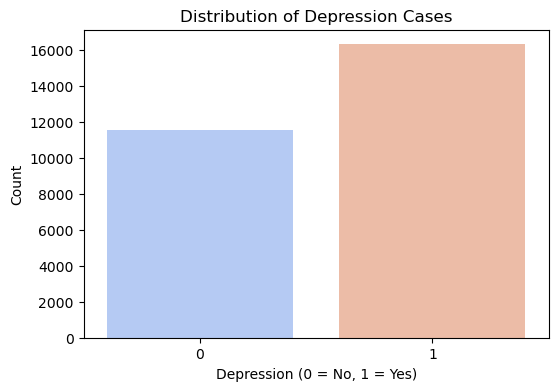

In [85]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Depression'], palette='coolwarm')
plt.title('Distribution of Depression Cases')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

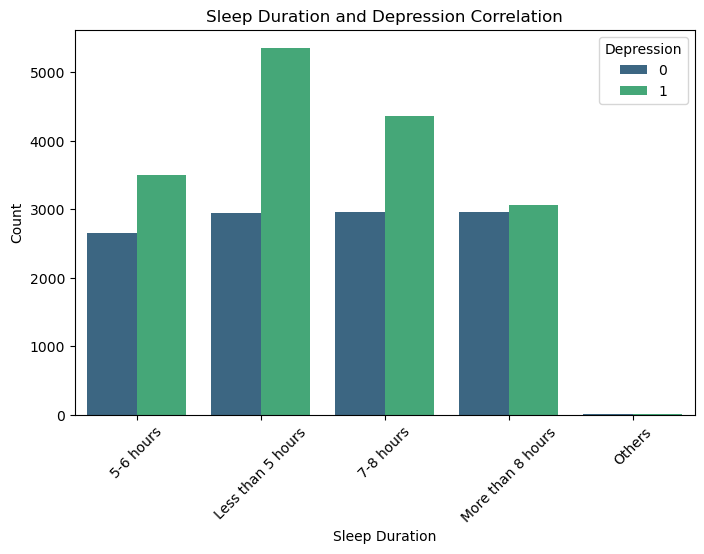

In [86]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Sleep_Duration'], hue=df['Depression'], palette='viridis')
plt.title('Sleep Duration and Depression Correlation')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

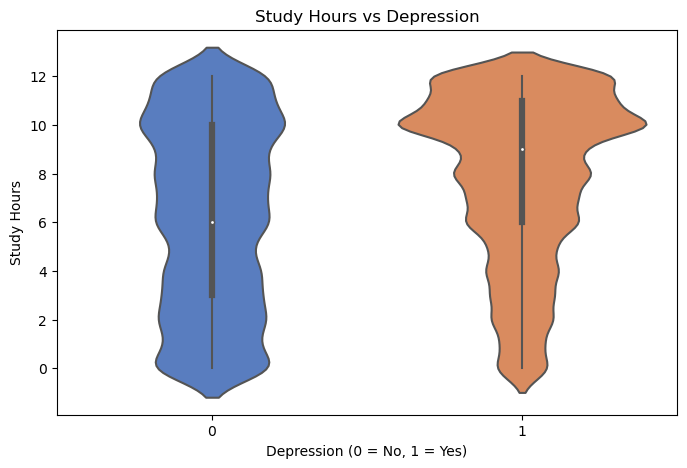

In [87]:
plt.figure(figsize=(8,5))
sns.violinplot(x=df['Depression'], y=df['Study_Hours'], palette='muted')
plt.title('Study Hours vs Depression')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Study Hours')
plt.show()

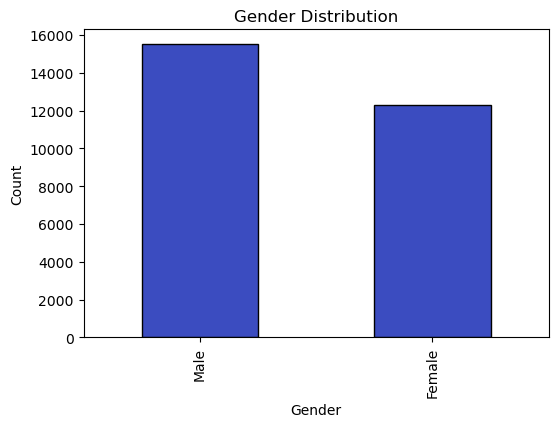

In [88]:
df["Gender"].value_counts().plot(kind="bar", colormap="coolwarm", edgecolor="black", figsize=(6, 4))
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [89]:
depression_by_gender = df.groupby("Gender")["Depression"].sum()
print(depression_by_gender)

Gender
Female    7203
Male      9094
Name: Depression, dtype: int64


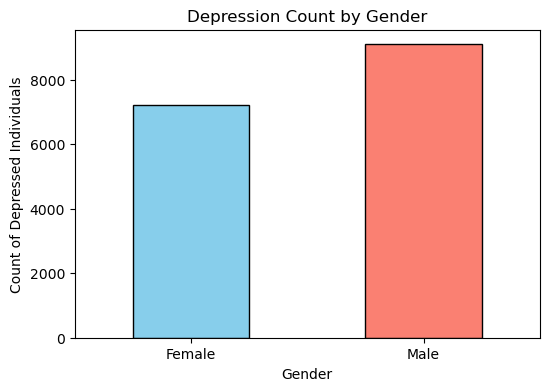

In [90]:
# Plot bar chart
plt.figure(figsize=(6, 4))
depression_by_gender.plot(kind="bar", color=["skyblue", "salmon"], edgecolor="black")
plt.title("Depression Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Depressed Individuals")
plt.xticks(rotation=0)
plt.show()


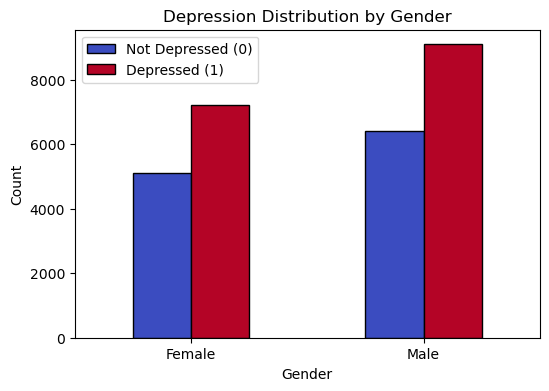

In [91]:
# Grouping by Gender and Depression status
depression_distribution = df.groupby("Gender")["Depression"].value_counts().unstack()

# Plot grouped bar chart
depression_distribution.plot(kind="bar", stacked=False, figsize=(6, 4), colormap="coolwarm", edgecolor="black")
plt.title("Depression Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.xticks(rotation=0)
plt.show()


C:\Users\anith\AppData\Local\Temp\ipykernel_1336\2851046900.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Gender"], y=df["Depression"], ci=None, palette="coolwarm")


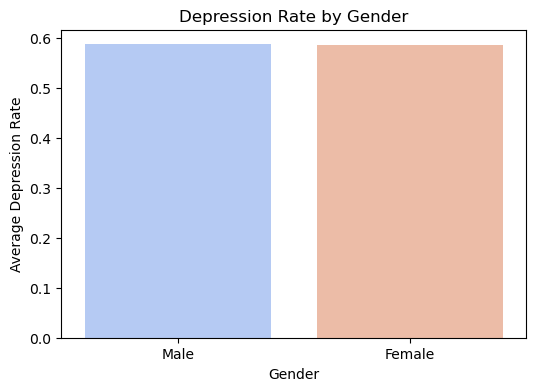

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x=df["Gender"], y=df["Depression"], ci=None, palette="coolwarm")
plt.title("Depression Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Depression Rate")
plt.show()


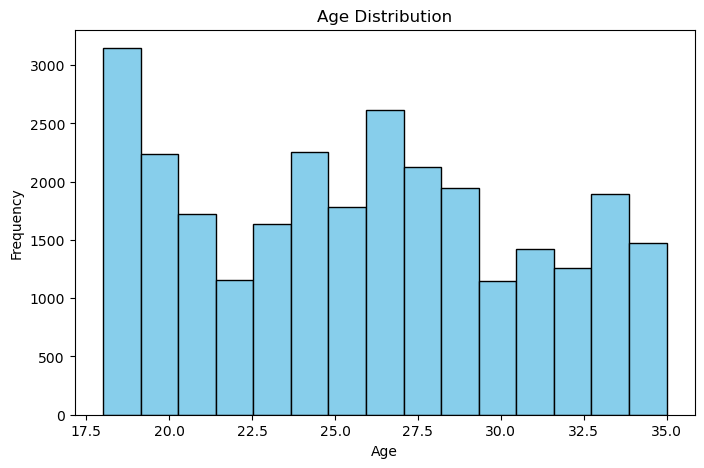

In [93]:
df["Age"].plot(kind="hist", bins=15, color="skyblue", edgecolor="black", figsize=(8, 5))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


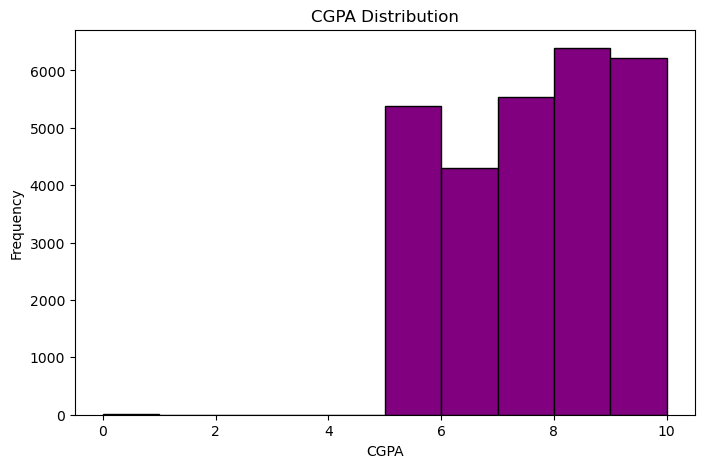

In [94]:
df["CGPA"].plot(kind="hist", bins=10, color="purple", edgecolor="black", figsize=(8, 5))
plt.title("CGPA Distribution")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()


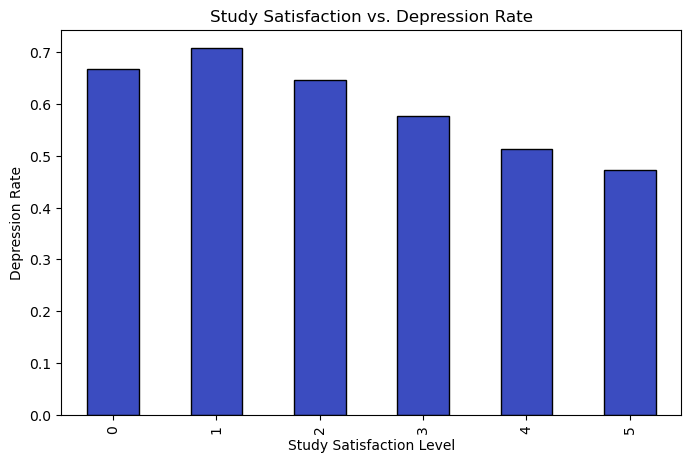

In [95]:
df.groupby("Study_Satisfaction")["Depression"].mean().plot(kind="bar", colormap="coolwarm", edgecolor="black", figsize=(8, 5))
plt.title("Study Satisfaction vs. Depression Rate")
plt.xlabel("Study Satisfaction Level")
plt.ylabel("Depression Rate")
plt.show()


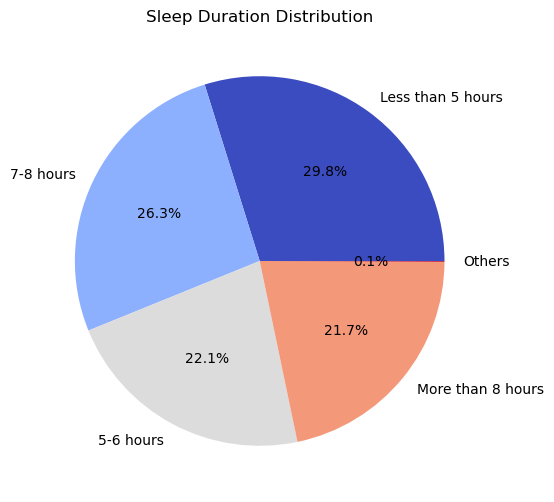

In [96]:
df["Sleep_Duration"].value_counts().plot(kind="pie", autopct="%1.1f%%", colormap="coolwarm", figsize=(6, 6))
plt.title("Sleep Duration Distribution")
plt.ylabel("")
plt.show()


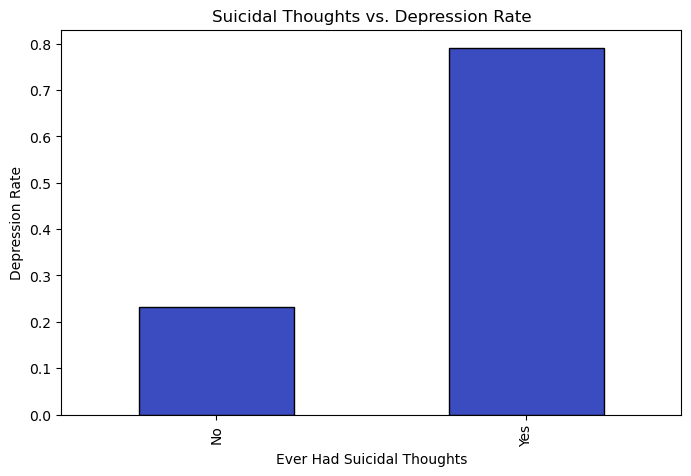

In [97]:
df.groupby("Ever_had_suicidal_thoughts")["Depression"].mean().plot(kind="bar", colormap="coolwarm", edgecolor="black", figsize=(8, 5))
plt.title("Suicidal Thoughts vs. Depression Rate")
plt.xlabel("Ever Had Suicidal Thoughts")
plt.ylabel("Depression Rate")
plt.show()


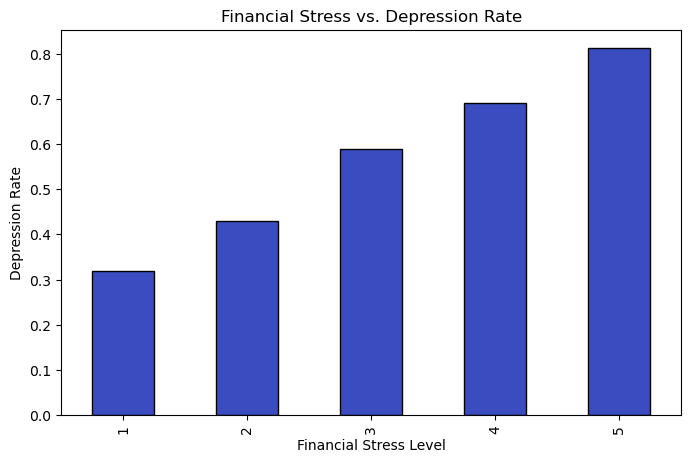

In [98]:
df.groupby("Financial_Stress")["Depression"].mean().plot(kind="bar", colormap="coolwarm", edgecolor="black", figsize=(8, 5))
plt.title("Financial Stress vs. Depression Rate")
plt.xlabel("Financial Stress Level")
plt.ylabel("Depression Rate")
plt.show()


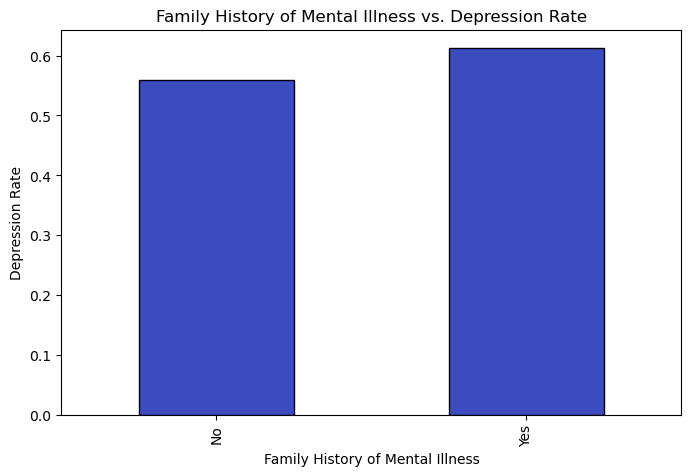

In [99]:
df.groupby("Family_History_of_Mental_Illness")["Depression"].mean().plot(kind="bar", colormap="coolwarm", edgecolor="black", figsize=(8, 5))
plt.title("Family History of Mental Illness vs. Depression Rate")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Depression Rate")
plt.show()


C:\Users\anith\AppData\Local\Temp\ipykernel_1336\3083125293.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["Dietary_Habits"], y=df["Depression"], ci=None, palette="coolwarm")


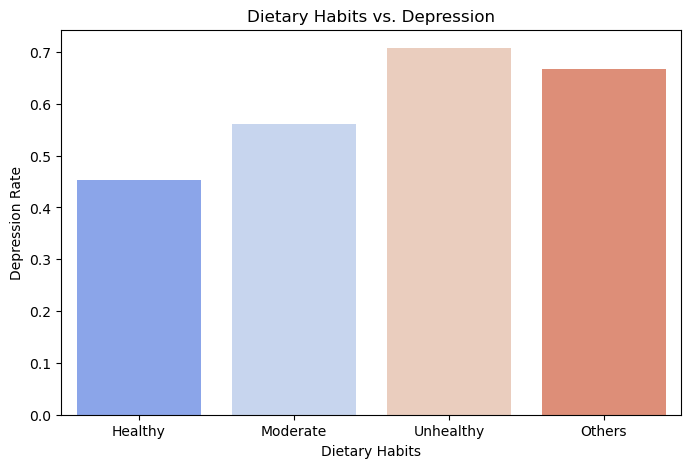

In [100]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["Dietary_Habits"], y=df["Depression"], ci=None, palette="coolwarm")
plt.title("Dietary Habits vs. Depression")
plt.xlabel("Dietary Habits")
plt.ylabel("Depression Rate")
plt.show()


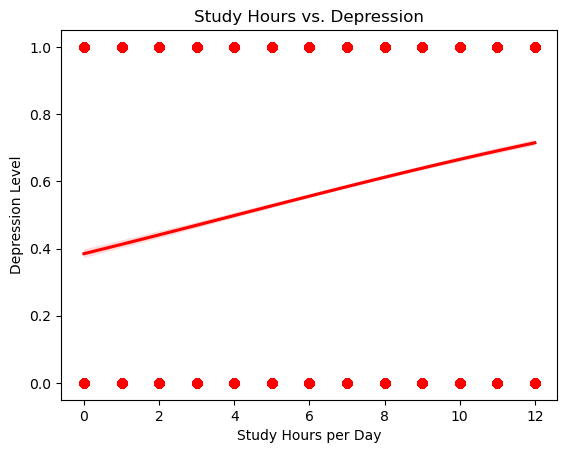

In [101]:

sns.regplot(x=df["Study_Hours"], y=df["Depression"], logistic=True, color="red")
plt.xlabel("Study Hours per Day")
plt.ylabel("Depression Level")
plt.title("Study Hours vs. Depression")
plt.show()


In [102]:
# plt.figure(figsize=(8, 5))
# sns.boxplot(x=df["Sleep_Duration"], y=df["CGPA"], palette="coolwarm")
# plt.title("Sleep Duration vs. CGPA")
# plt.xlabel("Sleep Duration")
# plt.ylabel("CGPA")
# plt.xticks(rotation=45)
# plt.show()


C:\Users\anith\AppData\Local\Temp\ipykernel_1336\760802007.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


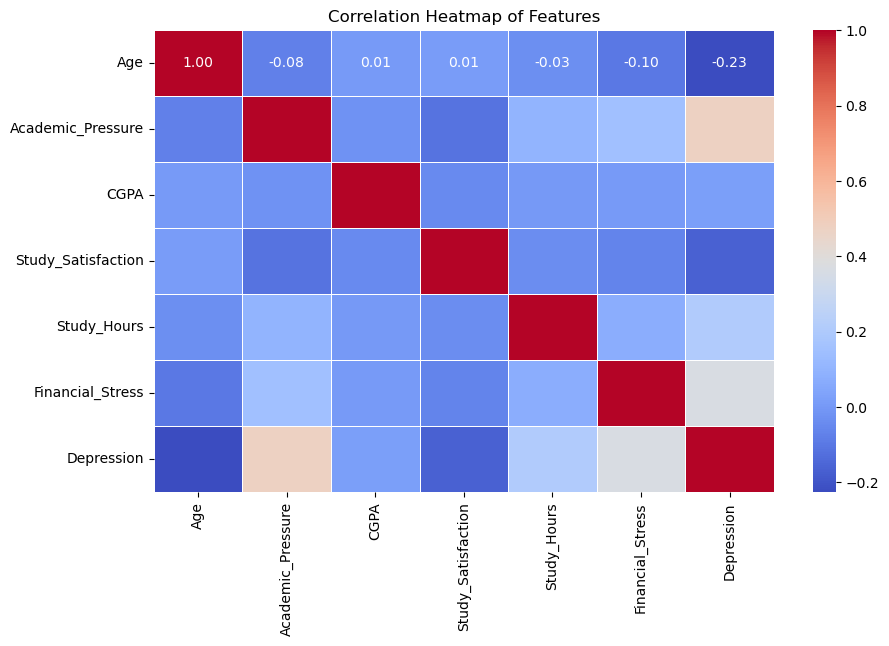

In [103]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


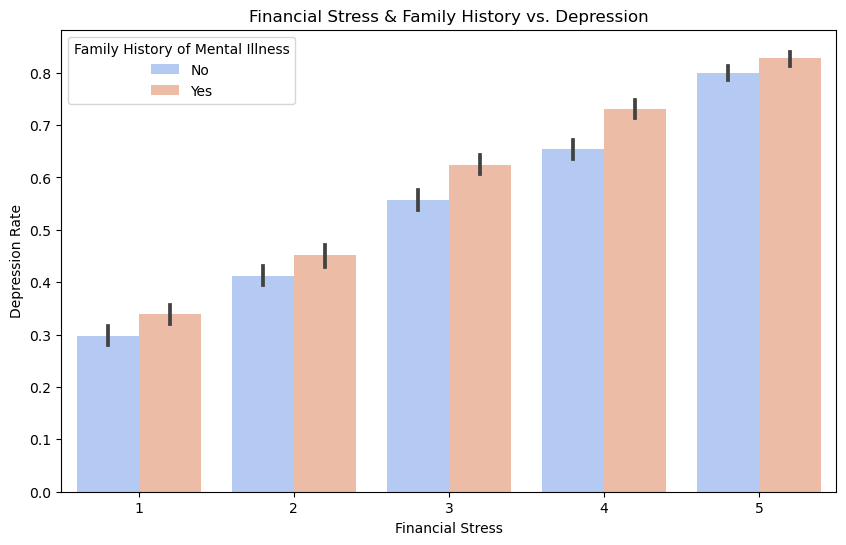

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["Financial_Stress"], y=df["Depression"], hue=df["Family_History_of_Mental_Illness"], palette="coolwarm")
plt.title("Financial Stress & Family History vs. Depression")
plt.xlabel("Financial Stress")
plt.ylabel("Depression Rate")
plt.legend(title="Family History of Mental Illness")
plt.show()


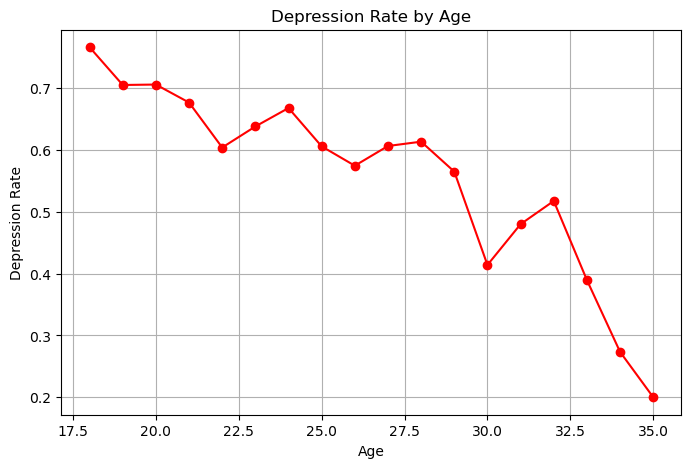

In [105]:
age_depression = df.groupby("Age")["Depression"].mean()
plt.figure(figsize=(8, 5))
plt.plot(age_depression.index, age_depression.values, marker="o", linestyle="-", color="red")
plt.title("Depression Rate by Age")
plt.xlabel("Age")
plt.ylabel("Depression Rate")
plt.grid()
plt.show()


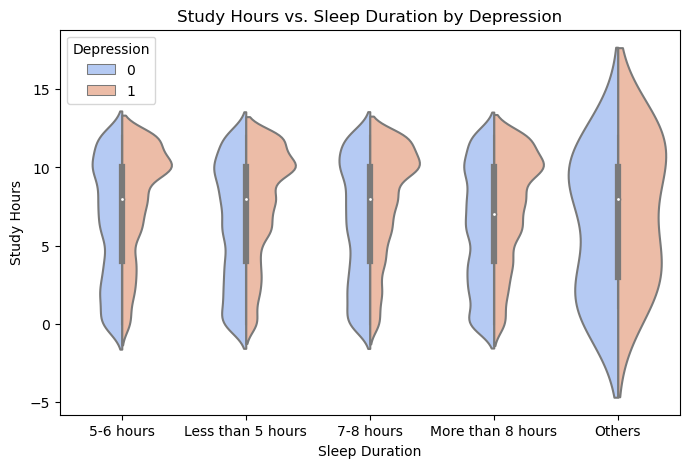

In [106]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df["Sleep_Duration"], y=df["Study_Hours"], hue=df["Depression"], split=True, palette="coolwarm")
plt.title("Study Hours vs. Sleep Duration by Depression")
plt.xlabel("Sleep Duration")
plt.ylabel("Study Hours")
plt.show()


In [107]:
df.head(20)

,Gender,Age,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Male,33,5,8.97,2,5-6 hours,Healthy,Yes,3,1,No,1
1,Female,24,2,5.90,5,5-6 hours,Moderate,No,3,2,Yes,0
2,Male,31,3,7.03,5,Less than 5 hours,Healthy,No,9,1,Yes,0
3,Female,28,3,5.59,2,7-8 hours,Moderate,Yes,4,5,Yes,1
4,Female,25,4,8.13,3,5-6 hours,Moderate,Yes,1,1,No,0
5,Male,29,2,5.70,3,Less than 5 hours,Healthy,No,4,1,No,0
6,Male,30,3,9.54,4,7-8 hours,Healthy,No,1,2,No,0
7,Female,30,2,8.04,4,Less than 5 hours,Unhealthy,No,0,1,Yes,0
8,Male,28,3,9.79,1,7-8 hours,Moderate,Yes,12,3,No,1
9,Male,31,2,8.38,3,Less than 5 hours,Moderate,Yes,2,5,No,1


In [108]:
df['Depression'].value_counts(normalize=True)


1    0.58557
0    0.41443
Name: Depression, dtype: float64

In [109]:
correlation_matrix = df.corr()
print(correlation_matrix)


                         Age  Academic_Pressure      CGPA  Study_Satisfaction  \
Age                 1.000000          -0.075712  0.006333            0.009655   
Academic_Pressure  -0.075712           1.000000 -0.022382           -0.111114   
CGPA                0.006333          -0.022382  1.000000           -0.044693   
Study_Satisfaction  0.009655          -0.111114 -0.044693            1.000000   
Study_Hours        -0.031045           0.096083  0.002560           -0.036395   
Financial_Stress   -0.097456           0.152076  0.005901           -0.065157   
Depression         -0.225904           0.474860  0.022529           -0.168186   

                    Study_Hours  Financial_Stress  Depression  
Age                   -0.031045         -0.097456   -0.225904  
Academic_Pressure      0.096083          0.152076    0.474860  
CGPA                   0.002560          0.005901    0.022529  
Study_Satisfaction    -0.036395         -0.065157   -0.168186  
Study_Hours            1.000000

C:\Users\anith\AppData\Local\Temp\ipykernel_1336\1752422992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


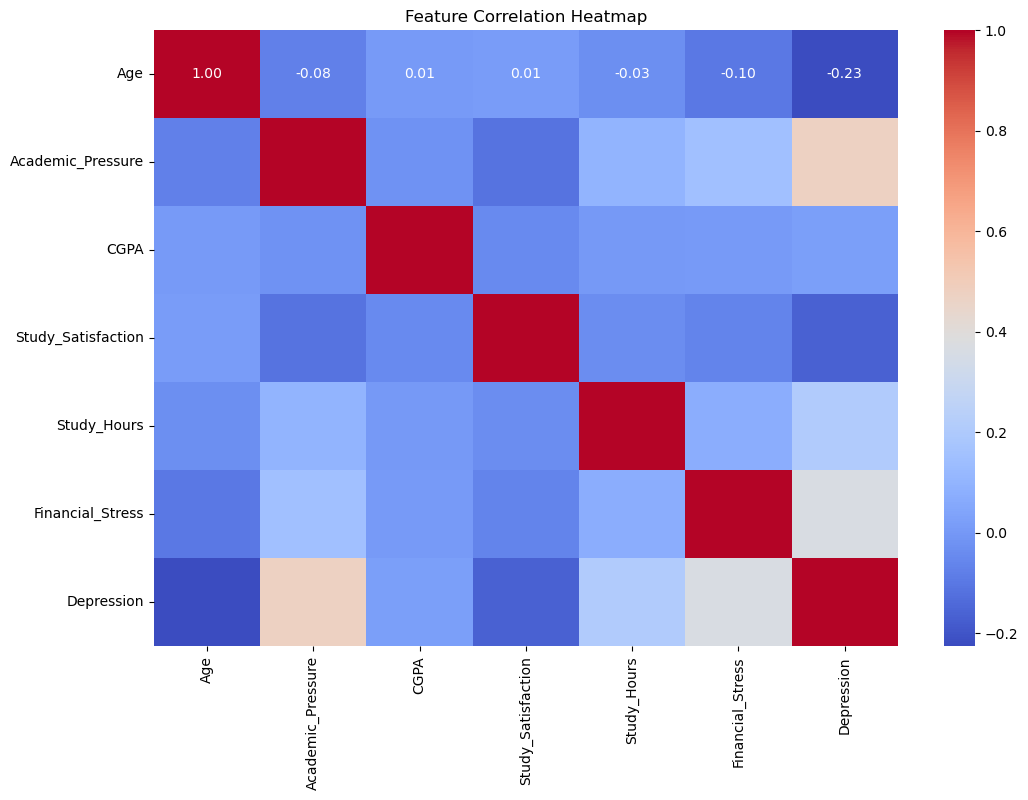

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [111]:
correlation_with_target = correlation_matrix["Depression"].sort_values(ascending=False)
print(correlation_with_target)


Depression            1.000000
Academic_Pressure     0.474860
Financial_Stress      0.364049
Study_Hours           0.208354
CGPA                  0.022529
Study_Satisfaction   -0.168186
Age                  -0.225904
Name: Depression, dtype: float64


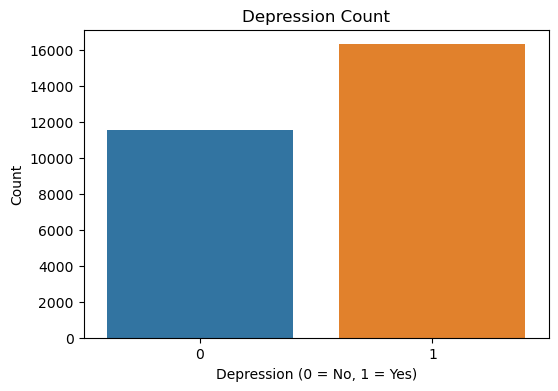

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=df)
plt.title('Depression Count')
plt.xlabel('Depression (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


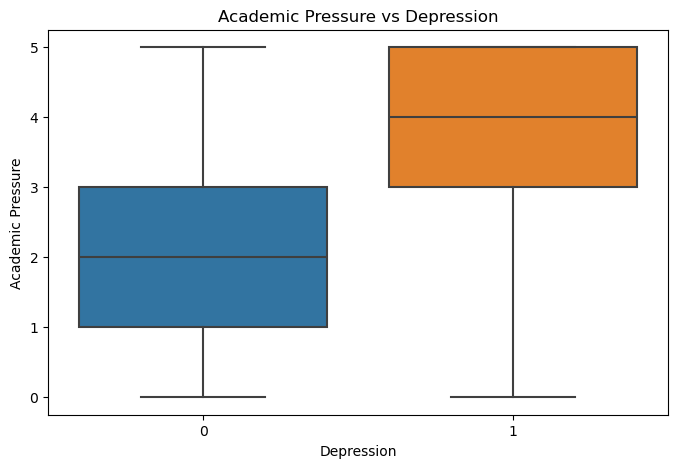

In [113]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Academic_Pressure', data=df)
plt.title('Academic Pressure vs Depression')
plt.xlabel('Depression')
plt.ylabel('Academic Pressure')
plt.show()


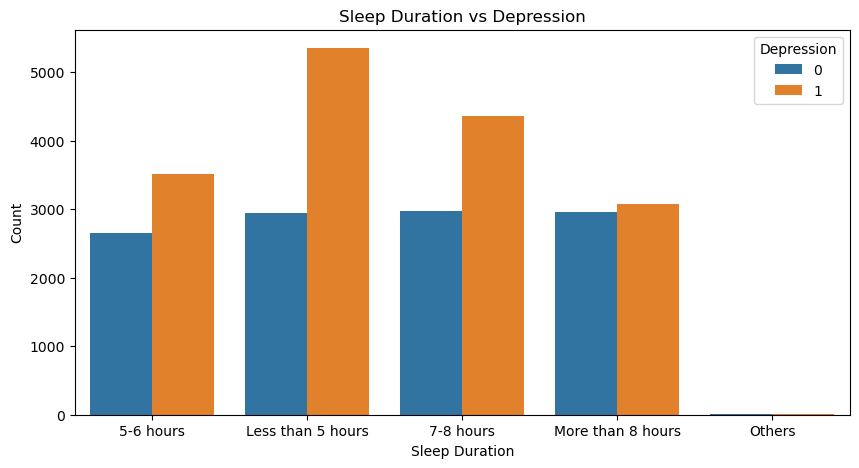

In [114]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sleep_Duration', hue='Depression', data=df)
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()


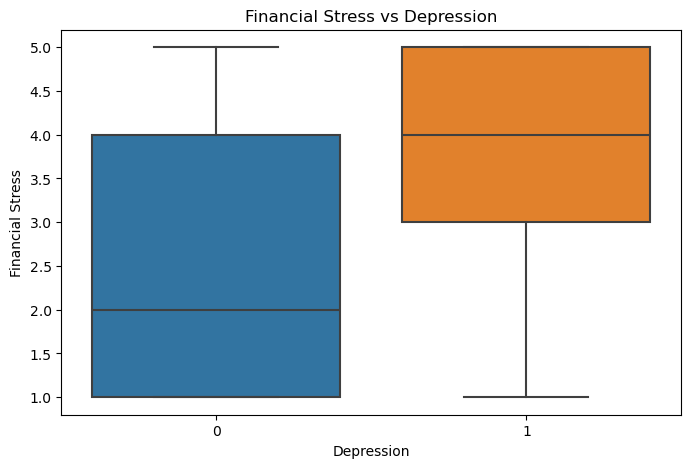

In [115]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Financial_Stress', data=df)
plt.title('Financial Stress vs Depression')
plt.xlabel('Depression')
plt.ylabel('Financial Stress')
plt.show()


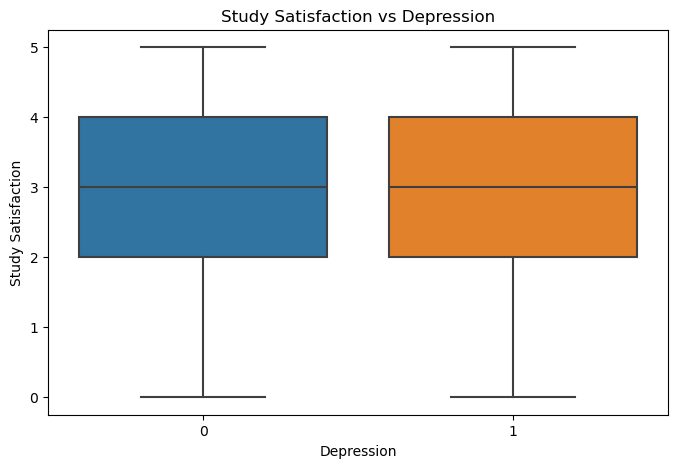

In [116]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Study_Satisfaction', data=df)
plt.title('Study Satisfaction vs Depression')
plt.xlabel('Depression')
plt.ylabel('Study Satisfaction')
plt.show()


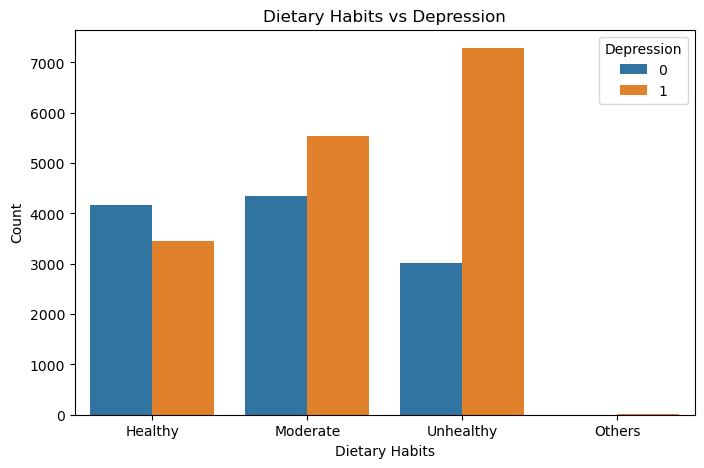

In [117]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Dietary_Habits', hue='Depression', data=df)
plt.title('Dietary Habits vs Depression')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.legend(title='Depression')
plt.show()


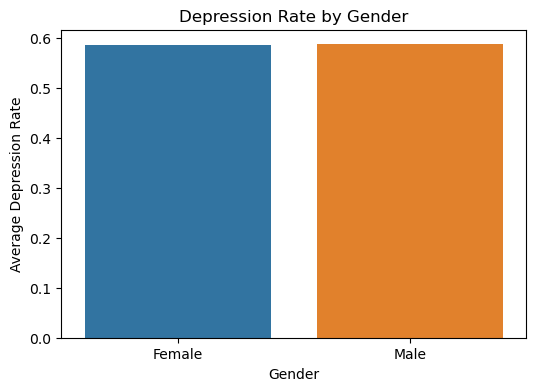

In [118]:
gender_group = df.groupby('Gender')['Depression'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=gender_group, x='Gender', y='Depression')
plt.title('Depression Rate by Gender')
plt.ylabel('Average Depression Rate')
plt.show()


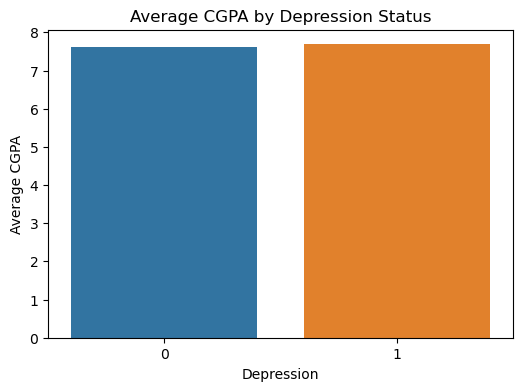

In [119]:
cgpa_group = df.groupby('Depression')['CGPA'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=cgpa_group, x='Depression', y='CGPA')
plt.title('Average CGPA by Depression Status')
plt.ylabel('Average CGPA')
plt.xlabel('Depression')
plt.show()


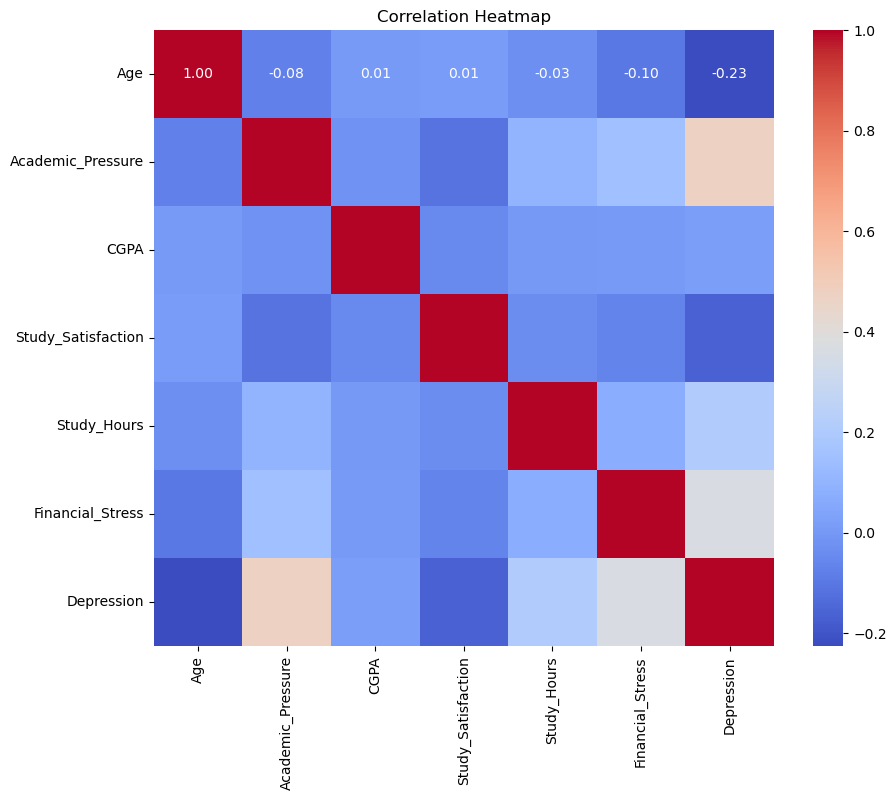

In [120]:
plt.figure(figsize=(10, 8))
numerical_cols = ['Age', 'Academic_Pressure', 'CGPA', 'Study_Satisfaction',
                  'Study_Hours', 'Financial_Stress', 'Depression']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


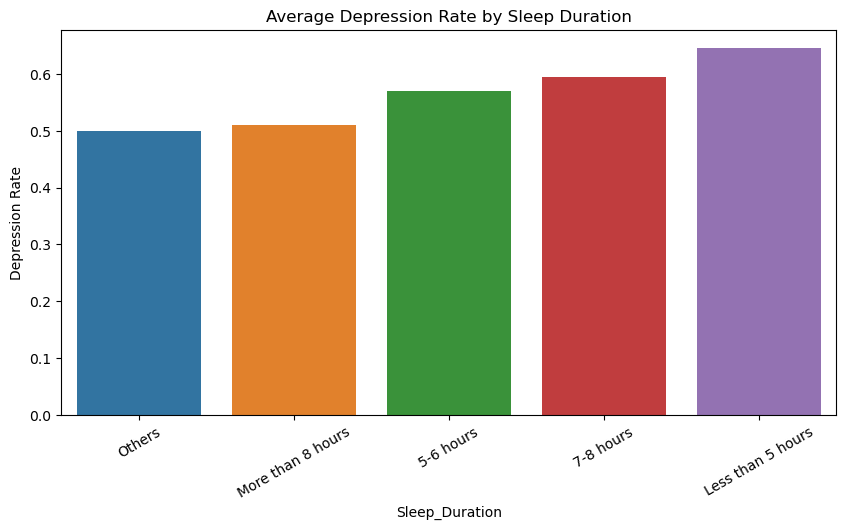

In [121]:
sleep_group = df.groupby('Sleep_Duration')['Depression'].mean().reset_index().sort_values('Depression')

plt.figure(figsize=(10, 5))
sns.barplot(data=sleep_group, x='Sleep_Duration', y='Depression')
plt.title('Average Depression Rate by Sleep Duration')
plt.ylabel('Depression Rate')
plt.xticks(rotation=30)
plt.show()


In [122]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE  # For handling class imbalance (if needed)


In [123]:
df["Dietary_Habits"].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [124]:
df.shape

(27831, 12)

In [125]:
# Label Encoding for binary categorical columns
binary_cols = [ 'Gender', 'Ever_had_suicidal_thoughts', 'Family_History_of_Mental_Illness']
label_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use (optional)

# Ordinal Encoding for ordered categories
sleep_duration_mapping = {
    "Others": 0,
    "5-6 hours": 1,
    "7-8 hours": 2,
    "More than 8 hours": 3,
    "Less than 5 hours" : 4
}
dietary_habits_mapping = {
    "Others": 0,
    "Moderate": 1,
    "Healthy": 2,
    "Unhealthy":3
}

df["Sleep_Duration"] = df["Sleep_Duration"].map(sleep_duration_mapping)
df["Dietary_Habits"] = df["Dietary_Habits"].map(dietary_habits_mapping)

  


C:\Users\anith\AppData\Local\Temp\ipykernel_1336\3173842200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\anith\AppData\Local\Temp\ipykernel_1336\3173842200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\anith\AppData\Local\Temp\ipykernel_1336\3173842200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [126]:
print(df.head())  # Check data after encoding


   Gender  Age  Academic_Pressure  CGPA  Study_Satisfaction  Sleep_Duration  \
0       1   33                  5  8.97                   2               1   
1       0   24                  2  5.90                   5               1   
2       1   31                  3  7.03                   5               4   
3       0   28                  3  5.59                   2               2   
4       0   25                  4  8.13                   3               1   

   Dietary_Habits  Ever_had_suicidal_thoughts  Study_Hours  Financial_Stress  \
0               2                           1            3                 1   
1               1                           0            3                 2   
2               2                           0            9                 1   
3               1                           1            4                 5   
4               1                           1            1                 1   

   Family_History_of_Mental_Illness  Depress

In [127]:
# Select numerical columns for scaling
num_cols = ['Age', 'CGPA','Study_Hours', 'Academic_Pressure', 'Study_Satisfaction','Financial_Stress']

# Apply MinMax scaling
scaler = MinMaxScaler()  # MinMaxScaler for tree-based models
df[num_cols] = scaler.fit_transform(df[num_cols])

C:\Users\anith\AppData\Local\Temp\ipykernel_1336\3881835325.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = scaler.fit_transform(df[num_cols])


In [128]:
df.head()

,Gender,Age,Academic_Pressure,CGPA,Study_Satisfaction,Sleep_Duration,Dietary_Habits,Ever_had_suicidal_thoughts,Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,1,0.882353,1.0,0.897,0.4,1,2,1,0.250000,0.00,0,1
1,0,0.352941,0.4,0.590,1.0,1,1,0,0.250000,0.25,1,0
2,1,0.764706,0.6,0.703,1.0,4,2,0,0.750000,0.00,1,0
3,0,0.588235,0.6,0.559,0.4,2,1,1,0.333333,1.00,1,1
4,0,0.411765,0.8,0.813,0.6,1,1,1,0.083333,0.00,0,0


In [129]:
df.shape

(27831, 12)

In [130]:
print(df['Depression'].value_counts(normalize=True))  # Check class distribution

1    0.58557
0    0.41443
Name: Depression, dtype: float64


In [131]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Depression'])  # Drop target column
y = df['Depression']  # Target variable

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")


Training size: (22264, 11), Testing size: (5567, 11)


## XGBoost

In [132]:
#!pip install xgboost

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27831 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            27831 non-null  int32  
 1   Age                               27831 non-null  float64
 2   Academic_Pressure                 27831 non-null  float64
 3   CGPA                              27831 non-null  float64
 4   Study_Satisfaction                27831 non-null  float64
 5   Sleep_Duration                    27831 non-null  int64  
 6   Dietary_Habits                    27831 non-null  int64  
 7   Ever_had_suicidal_thoughts        27831 non-null  int32  
 8   Study_Hours                       27831 non-null  float64
 9   Financial_Stress                  27831 non-null  float64
 10  Family_History_of_Mental_Illness  27831 non-null  int32  
 11  Depression                        27831 non-null  int64  
dtypes: f

In [134]:
import xgboost as xgb
from xgboost import XGBClassifier


In [135]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,      # Number of trees
    learning_rate=0.1,     # Step size shrinkage (controls updates)
    max_depth=6,           # Maximum depth of a tree
    subsample=0.8,         # Subsample ratio for training instances
    colsample_bytree=0.8,  # Subsample ratio of columns per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # Avoids warning messages
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Model Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)


D:\Users\anith\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:53:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [136]:
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

# Detailed Performance Report
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8428
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      2307
           1       0.86      0.88      0.87      3260

    accuracy                           0.84      5567
   macro avg       0.84      0.83      0.84      5567
weighted avg       0.84      0.84      0.84      5567

Confusion Matrix:
 [[1820  487]
 [ 388 2872]]


In [137]:
from xgboost import XGBClassifier


In [145]:
import pandas as pd
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Load your cleaned dataset
X = df.drop(columns=['Depression'])
y = df['Depression']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base model
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits


D:\Users\anith\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [146]:

# Evaluate
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 85.04%


In [140]:

# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2284
           1       0.87      0.88      0.87      3283

    accuracy                           0.85      5567
   macro avg       0.84      0.84      0.84      5567
weighted avg       0.85      0.85      0.85      5567



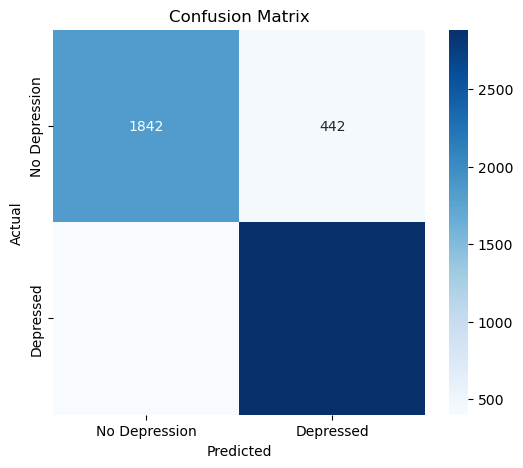

In [141]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Depression', 'Depressed'], yticklabels=['No Depression', 'Depressed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


[0]	train-logloss:0.63581	test-logloss:0.63426
[1]	train-logloss:0.62194	test-logloss:0.62099
[2]	train-logloss:0.58998	test-logloss:0.58907
[3]	train-logloss:0.58235	test-logloss:0.58139
[4]	train-logloss:0.55523	test-logloss:0.55433
[5]	train-logloss:0.54661	test-logloss:0.54582
[6]	train-logloss:0.52480	test-logloss:0.52401
[7]	train-logloss:0.50672	test-logloss:0.50603
[8]	train-logloss:0.49107	test-logloss:0.49051
[9]	train-logloss:0.48122	test-logloss:0.48100
[10]	train-logloss:0.47137	test-logloss:0.47102
[11]	train-logloss:0.46211	test-logloss:0.46171
[12]	train-logloss:0.45256	test-logloss:0.45241
[13]	train-logloss:0.44567	test-logloss:0.44564
[14]	train-logloss:0.43779	test-logloss:0.43793
[15]	train-logloss:0.43120	test-logloss:0.43141
[16]	train-logloss:0.42650	test-logloss:0.42685
[17]	train-logloss:0.42262	test-logloss:0.42290
[18]	train-logloss:0.41843	test-logloss:0.41852
[19]	train-logloss:0.41406	test-logloss:0.41448
[20]	train-logloss:0.41004	test-logloss:0.41052
[2

D:\Users\anith\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [14:54:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()


[30]	train-logloss:0.38396	test-logloss:0.38467
[31]	train-logloss:0.38206	test-logloss:0.38265
[32]	train-logloss:0.38017	test-logloss:0.38081
[33]	train-logloss:0.37896	test-logloss:0.37989
[34]	train-logloss:0.37727	test-logloss:0.37832
[35]	train-logloss:0.37579	test-logloss:0.37688
[36]	train-logloss:0.37435	test-logloss:0.37531
[37]	train-logloss:0.37301	test-logloss:0.37401
[38]	train-logloss:0.37178	test-logloss:0.37275
[39]	train-logloss:0.37059	test-logloss:0.37160
[40]	train-logloss:0.36940	test-logloss:0.37055
[41]	train-logloss:0.36833	test-logloss:0.36950
[42]	train-logloss:0.36731	test-logloss:0.36835
[43]	train-logloss:0.36631	test-logloss:0.36729
[44]	train-logloss:0.36550	test-logloss:0.36666
[45]	train-logloss:0.36460	test-logloss:0.36584
[46]	train-logloss:0.36366	test-logloss:0.36499
[47]	train-logloss:0.36282	test-logloss:0.36414
[48]	train-logloss:0.36202	test-logloss:0.36339
[49]	train-logloss:0.36124	test-logloss:0.36260
[50]	train-logloss:0.36050	test-logloss:

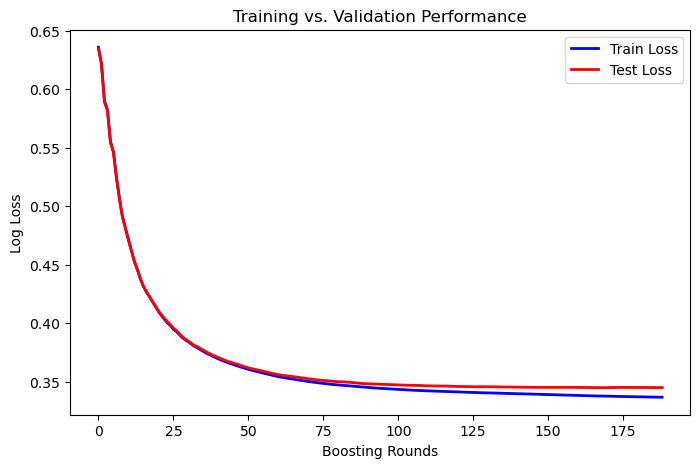

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Convert data into XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for training (best params from tuning)
params = random_search.best_params_
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'

# Train model with evaluation set to track performance
evals_result = {}
best_xgb = xgb.train(
    params, dtrain, num_boost_round=200,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=20,  # Stop if no improvement after 20 rounds
    evals_result=evals_result,
    verbose_eval=True
)

# Extract train and test accuracy values
train_loss = evals_result['train']['logloss']
test_loss = evals_result['test']['logloss']

# Plot training and validation performance
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(train_loss)), train_loss, label='Train Loss', color='blue', linewidth=2)
plt.plot(np.arange(len(test_loss)), test_loss, label='Test Loss', color='red', linewidth=2)
plt.xlabel("Boosting Rounds")
plt.ylabel("Log Loss")
plt.title("Training vs. Validation Performance")
plt.legend()
plt.show()


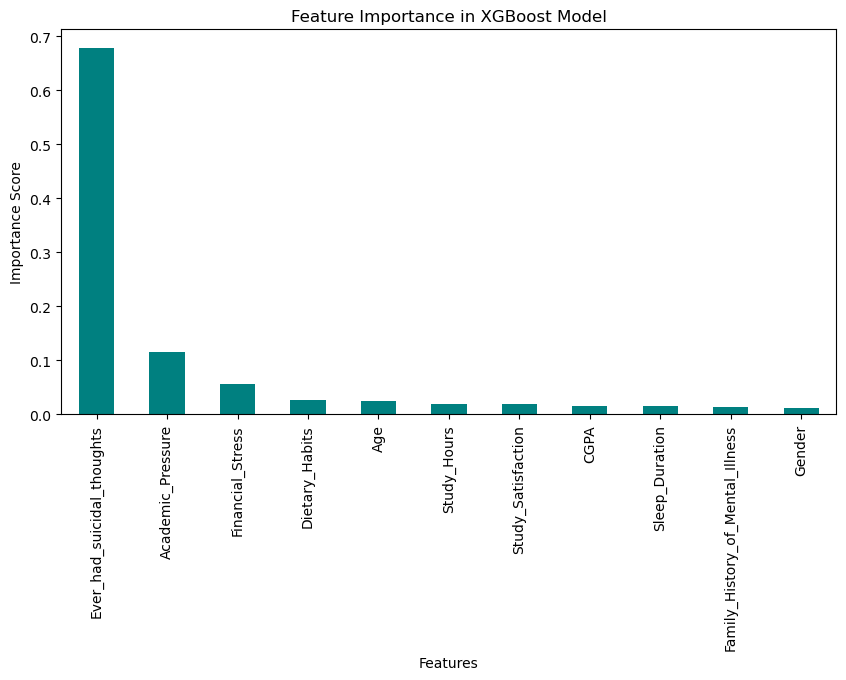

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10,5))
feature_importances.plot(kind='bar', color='teal')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in XGBoost Model")
plt.show()


In [148]:
 # Fit the best model with evaluation tracking
eval_set = [(X_train, y_train), (X_test, y_test)]
best_xgb.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Extract learning curves
results = best_xgb.evals_result()




D:\Users\anith\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:11:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


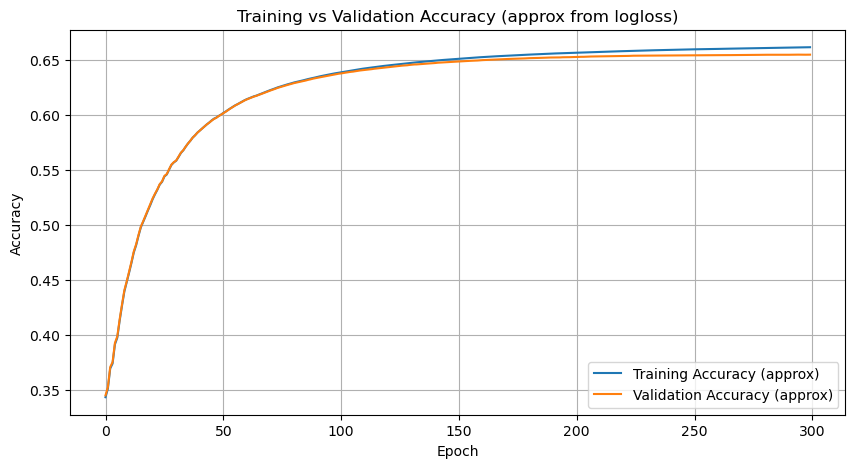

In [149]:

# Plot Training vs Validation Accuracy
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 5))
plt.plot(x_axis, 1 - np.array(results['validation_0']['logloss']), label='Training Accuracy (approx)')
plt.plot(x_axis, 1 - np.array(results['validation_1']['logloss']), label='Validation Accuracy (approx)')
plt.title('Training vs Validation Accuracy (approx from logloss)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

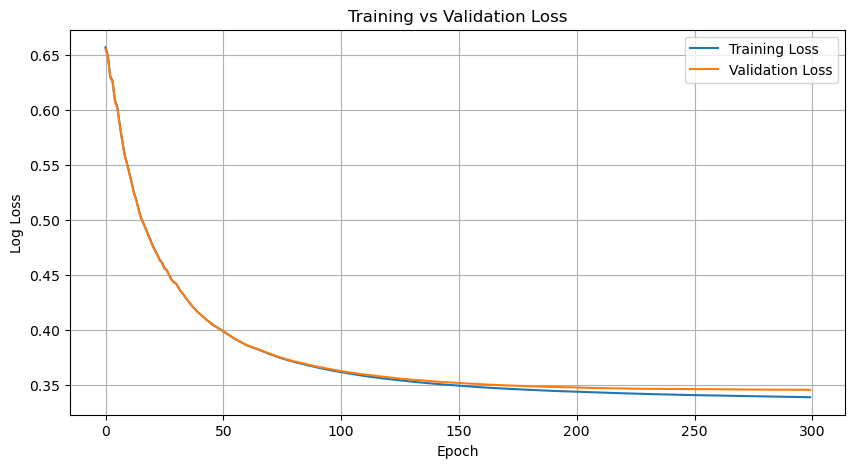

In [150]:
 # Plot Training vs Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['logloss'], label='Training Loss')
plt.plot(x_axis, results['validation_1']['logloss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()


In [154]:
print(accuracy)

0.8503682414226693


In [153]:
import joblib
# Save model
joblib.dump(best_xgb, 'model.pkl')
 

['model.pkl']